<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree

Dataset - https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df["User ID"].value_counts()

15624510    1
15767681    1
15589449    1
15791373    1
15688172    1
           ..
15675185    1
15792102    1
15722758    1
15745232    1
15594041    1
Name: User ID, Length: 400, dtype: int64

In [ ]:
df.drop(columns = ["User ID"], inplace  = True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
X = df.drop(columns = ["Purchased"])
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 24)
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (320, 3)
Shape of y_train (320,)
Shape of X_test (80, 3)
Shape of y_test (80,)


In [ ]:
X_train.head()

,Gender,Age,EstimatedSalary
105,Male,21,72000
17,Male,45,26000
64,Female,59,83000
349,Male,38,61000
116,Male,35,75000


In [ ]:
X_train["Gender"].value_counts()

Female    164
Male      156
Name: Gender, dtype: int64

In [ ]:
X_test["Gender"].value_counts()

Male      40
Female    40
Name: Gender, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train["Gender"] = enc.fit_transform(X_train[["Gender"]])
X_test["Gender"] = enc.transform(X_test[["Gender"]])

In [ ]:
X_train.head()

,Gender,Age,EstimatedSalary
105,1.0,21,72000
17,1.0,45,26000
64,0.0,59,83000
349,1.0,38,61000
116,1.0,35,75000


In [ ]:
X_test.head()

,Gender,Age,EstimatedSalary
115,1.0,40,57000
186,0.0,20,82000
366,0.0,58,47000
81,1.0,39,42000
314,0.0,39,79000


In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19,19000,0
1,1.0,35,20000,0
2,0.0,26,43000,0
3,0.0,27,57000,0
4,1.0,19,76000,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 105 to 387
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           320 non-null    float64
 1   Age              320 non-null    int64  
 2   EstimatedSalary  320 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.0 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 115 to 267
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           80 non-null     float64
 1   Age              80 non-null     int64  
 2   EstimatedSalary  80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [ ]:
df.drop(columns = ["User ID"], inplace = True)
df["Gender"] = df.Gender.replace({"Female": 1, "Male" :0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [ ]:
X = df.drop(columns = ["Purchased"])
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_test -: {X_test.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_test -: {y_test.shape}')

Shape of X_train -: (320, 3)
Shape of X_test -: (80, 3)
Shape of y_train -: (320,)
Shape of y_test -: (80,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

0.996875

In [ ]:
model.score(X_test, y_test)

0.8625

In [ ]:
X_train.head()

,Gender,Age,EstimatedSalary
105,0,21,72000
17,0,45,26000
64,1,59,83000
349,0,38,61000
116,0,35,75000


In [ ]:
X_train[~(X_train["Age"] <= 41.5)]

,Gender,Age,EstimatedSalary
17,1.0,45,26000
64,0.0,59,83000
265,0.0,42,108000
298,1.0,45,79000
23,0.0,45,22000
...,...,...,...
379,0.0,58,23000
227,1.0,56,133000
207,0.0,52,114000
356,1.0,54,70000


In [ ]:
y_train.value_counts()

0    205
1    115
Name: Purchased, dtype: int64

## Plotting Decision Tree

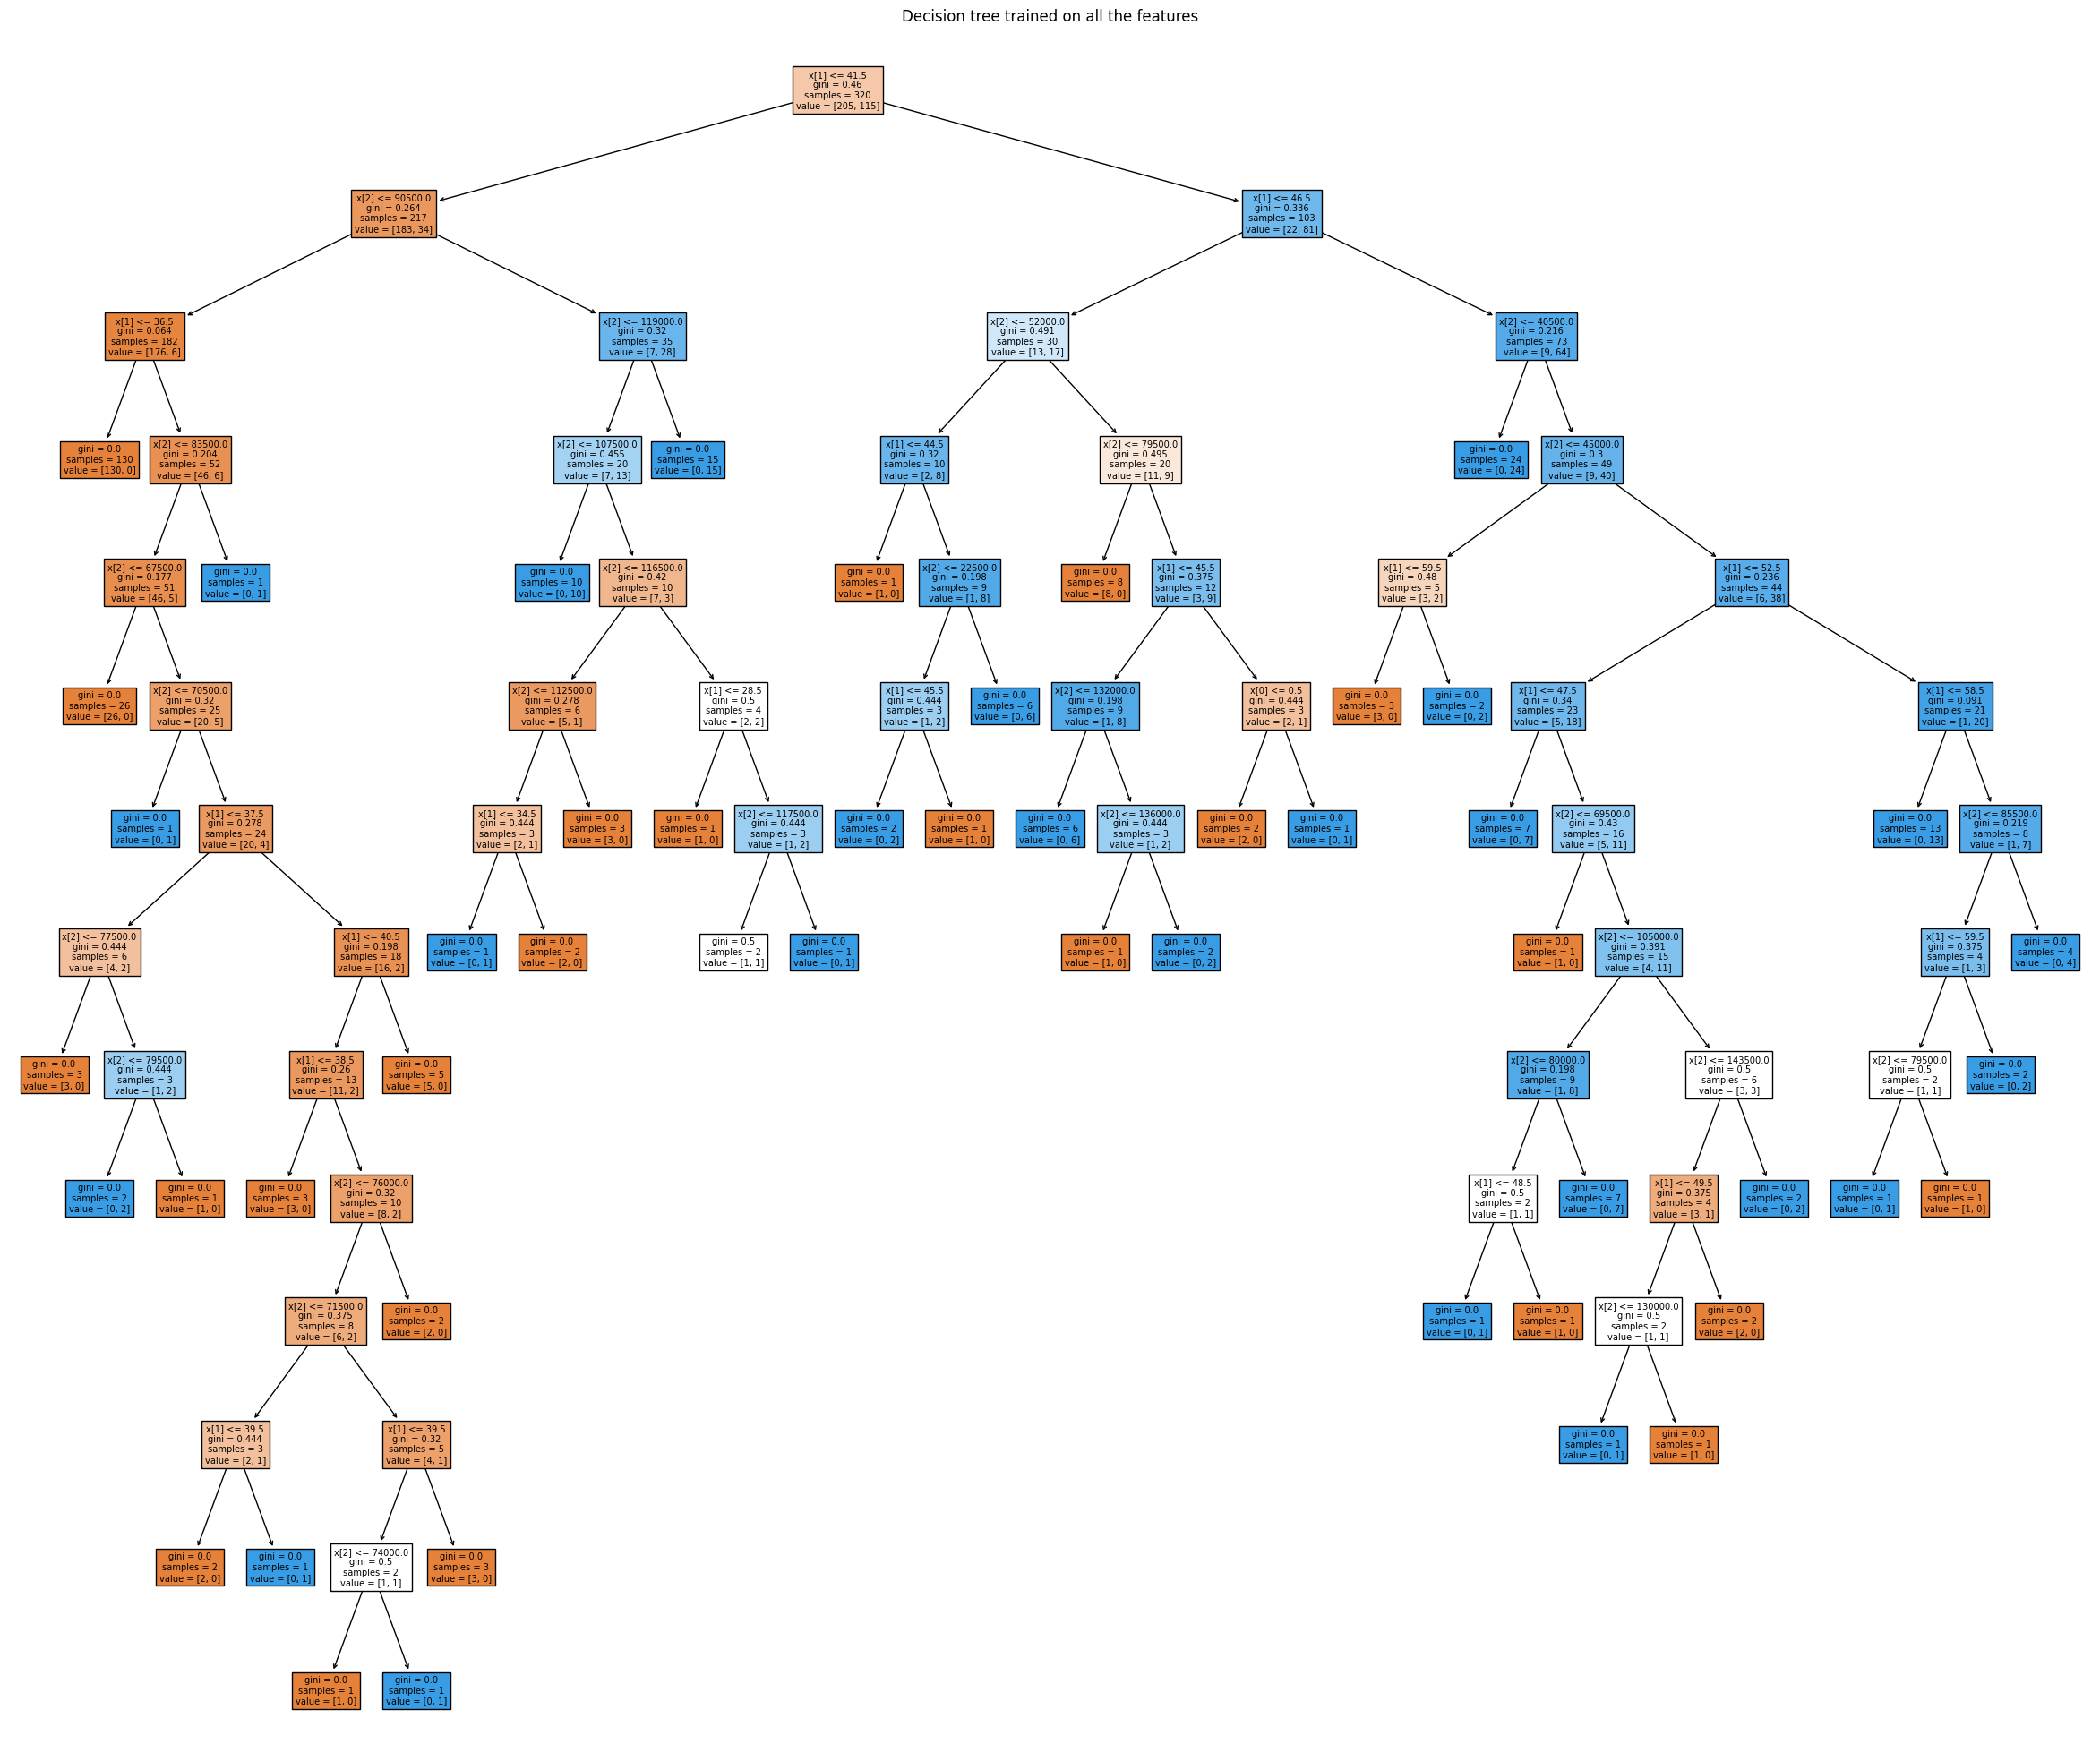

In [ ]:
from sklearn.tree import plot_tree
figure = plt.figure(figsize=(30, 25))
# plt.figure()

plot_tree(model, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

## Decision Tree Hyperparameter

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]

Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth = 3, min_weight_fraction_leaf = 0.1)
model = model.fit(X_train,y_train)

In [ ]:
model.score(X_train, y_train)

0.890625

In [ ]:
model.score(X_test, y_test)

0.925

In [ ]:
138/320

0.43125

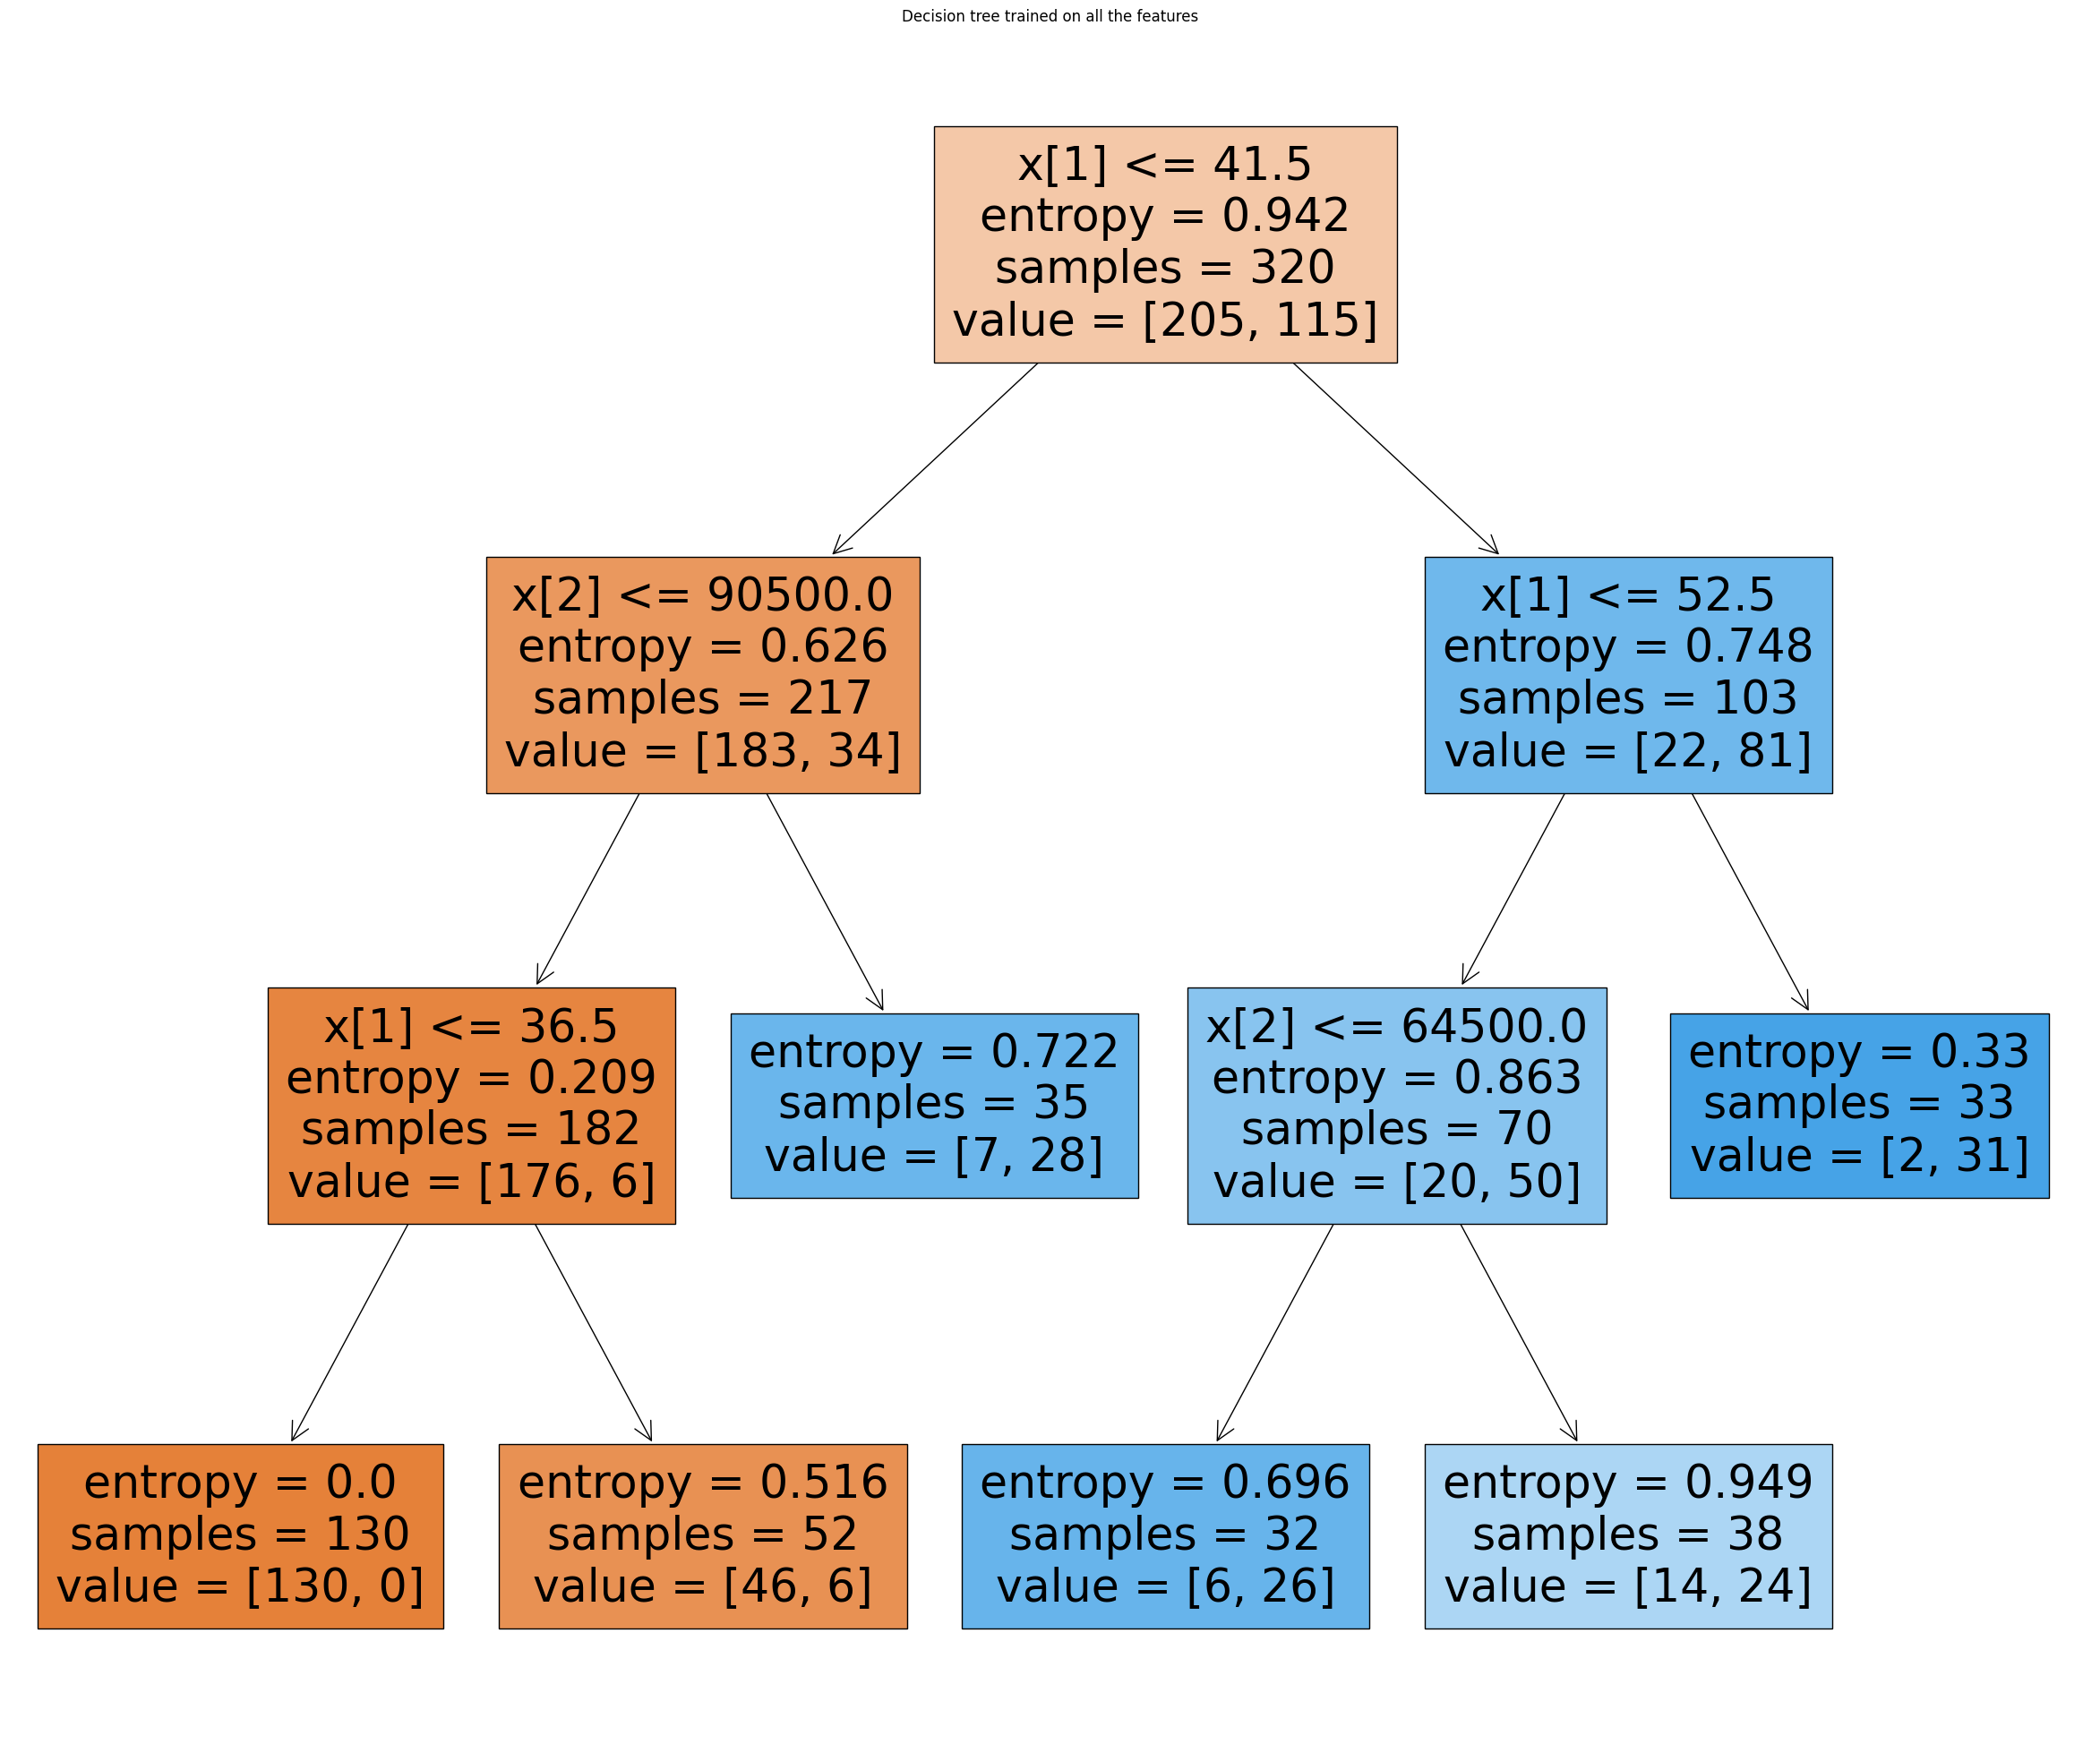

In [ ]:
from sklearn.tree import plot_tree
figure = plt.figure(figsize=(30, 25))
# plt.figure()

plot_tree(model, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

In [ ]:
model.score(X_train,y_train)

0.896875

In [ ]:
model.score(X_test,y_test)

0.9375

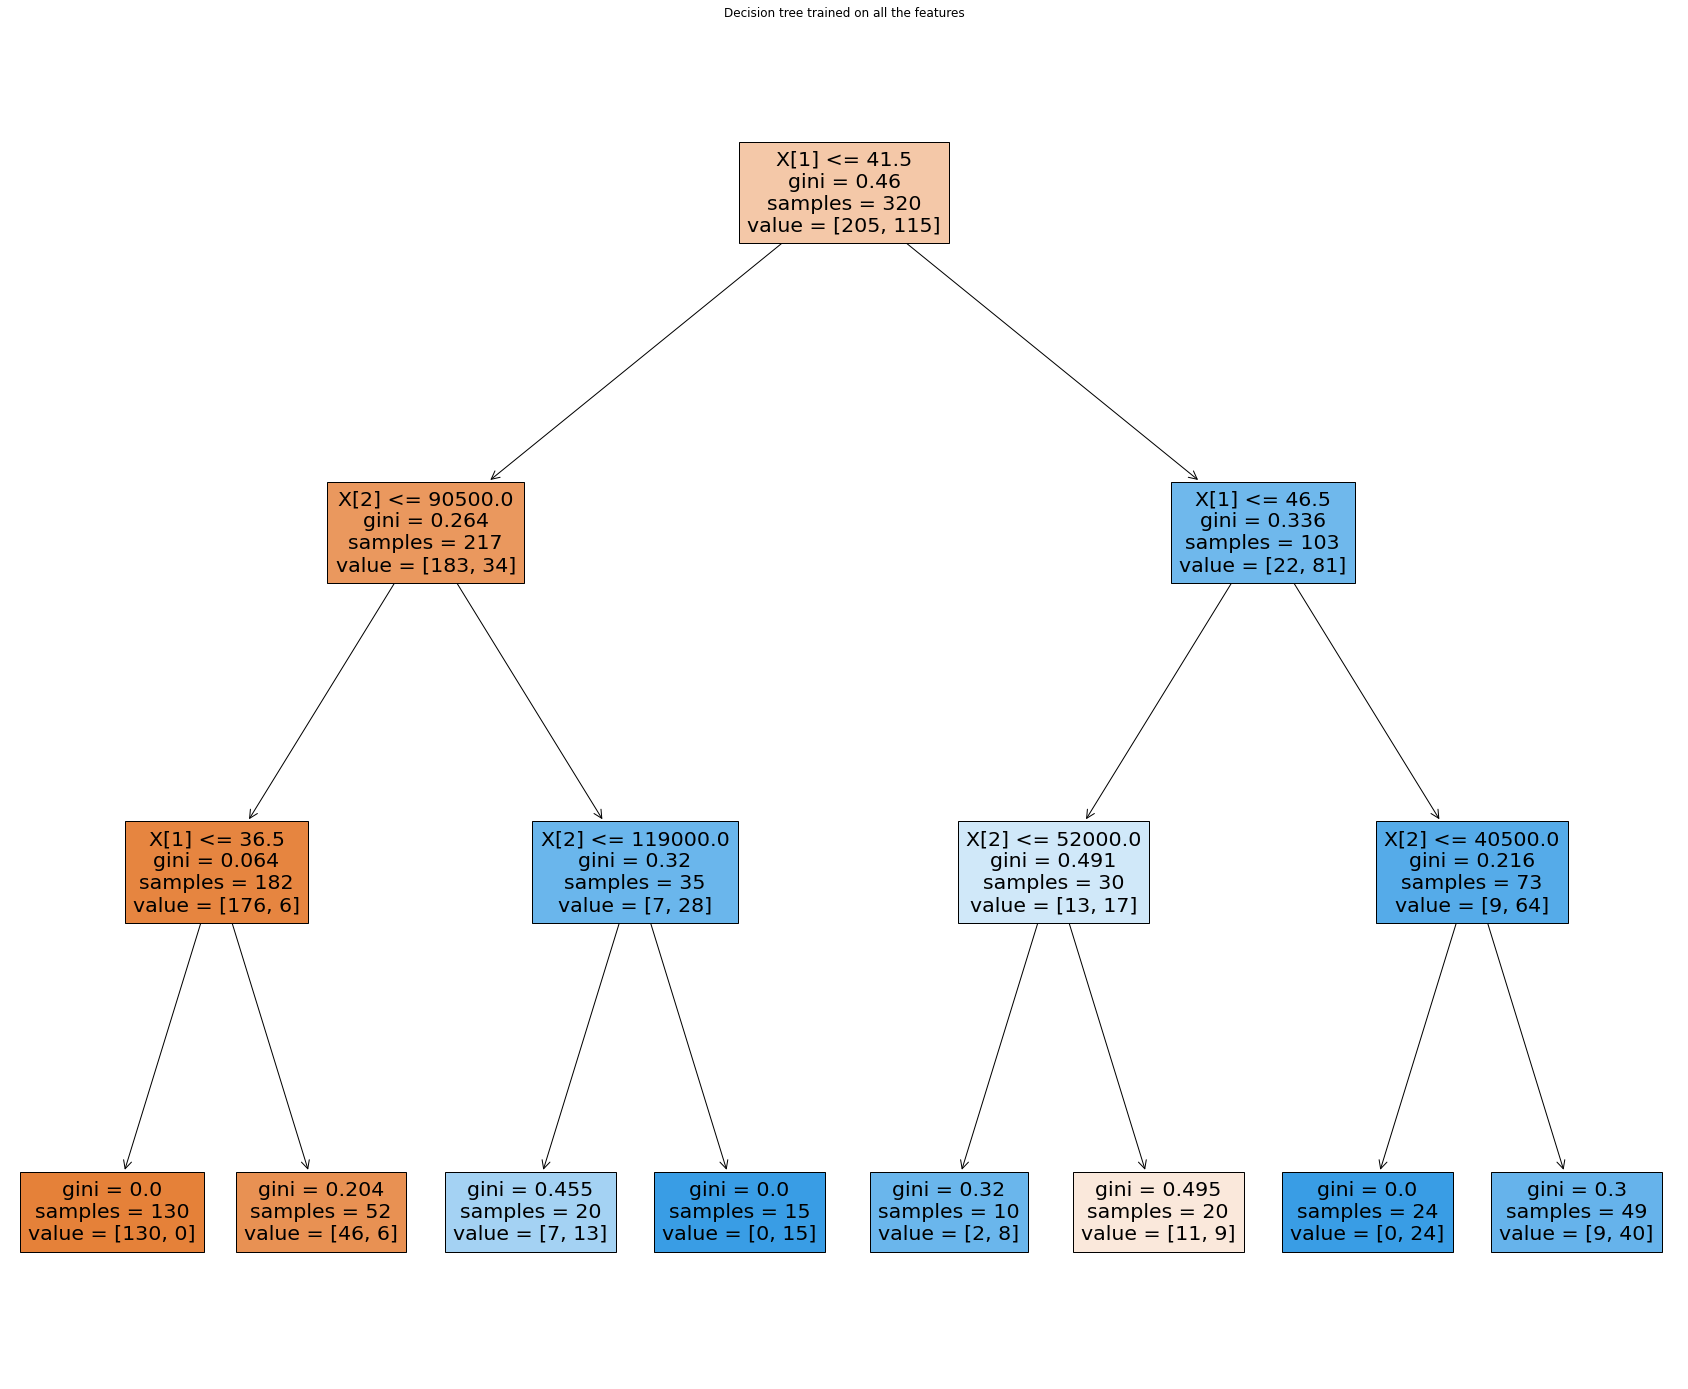

In [ ]:
from sklearn.tree import plot_tree
figure = plt.figure(figsize=(30, 25))
# plt.figure()

plot_tree(model, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

In [ ]:
model.feature_importances_

array([0.        , 0.58560735, 0.41439265])

In [ ]:
X_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model.feature_importances_
})

In [ ]:
imp_df

,Varname,Imp
0,Gender,0.000000
1,Age,0.585607
2,EstimatedSalary,0.414393


In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Age,0.585607
2,EstimatedSalary,0.414393
0,Gender,0.000000


In [ ]:
imp_df[imp_df["Imp"] > 0.45]

,Varname,Imp
1,Age,0.585607


<Axes: xlabel='Imp', ylabel='Varname'>

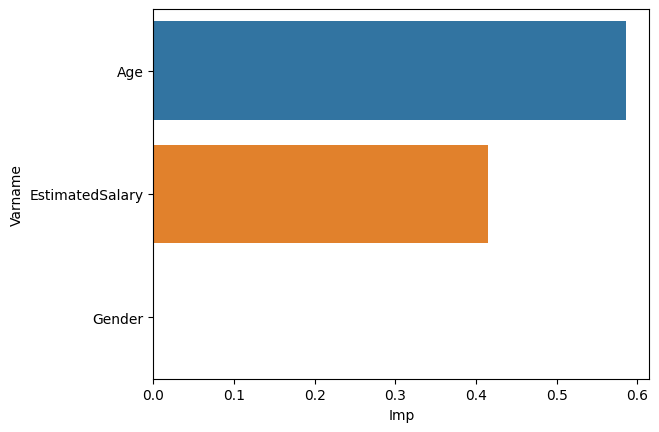

In [ ]:
sns.barplot(data=imp_df.sort_values(by="Imp", ascending=False), x="Imp", y="Varname")

##Plotting decision boundary

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [ ]:
X = df.drop(columns = ["Purchased", "Gender"])
y = df["Purchased"]

In [ ]:
# generate dataset
X, y = np.array(X), np.array(y)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = np.where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
plt.show()